In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

1.14.0


In [4]:
#Loading the fashion_mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
train_labels.shape

(60000,)

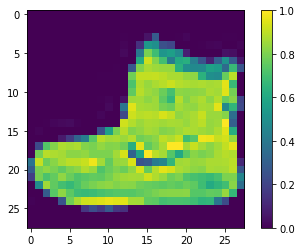

In [31]:
#Viewing the first picture
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0


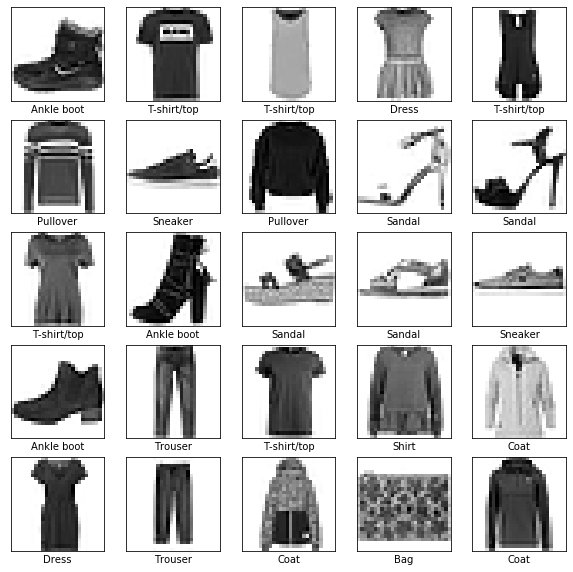

In [22]:
#Displaying the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
#model with 3 layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4996 - acc: 0.8250
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3751 - acc: 0.8657
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3368 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3152 - acc: 0.8840
Epoch 5/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2960 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2821 - acc: 0.8954
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2714 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2590 - acc: 0.9041
Epoch 9/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2497 - acc: 0.9073
Epoch 10/10
60000/60000 [==============================] - 2s 41us/sample - loss: 

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3419 - acc: 0.8791

Test accuracy: 0.8791


In [27]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

In [29]:
predictions[0]

array([4.1854064e-06, 6.9220922e-09, 1.0895153e-08, 3.1886702e-09,
       3.8759549e-06, 1.9840868e-03, 2.7933997e-06, 1.2844230e-01,
       1.6009852e-07, 8.6956251e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [34]:
#Function to plot the images
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [35]:
#Function to plot the prediction probability for the test images
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

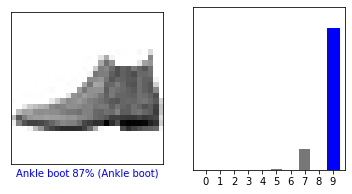

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

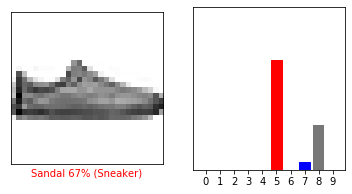

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

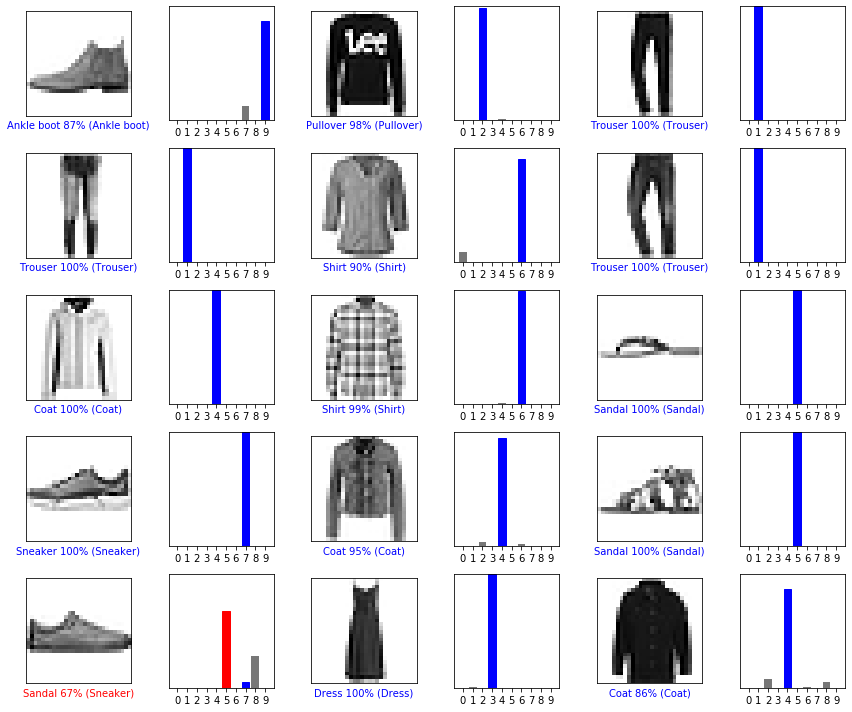

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [40]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.3509389e-06 7.5108413e-11 9.8350495e-01 5.6866567e-11 1.6411917e-02
  9.6295629e-09 7.3765499e-05 6.8119690e-12 9.2722583e-12 8.1957112e-14]]
